In [3]:
DATA_PH = "../data/Combined Cycle Power Plant Data Set.csv"

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(DATA_PH)
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.4,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.5,1009.23,96.62,473.9


In [4]:
df.shape

(47844, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47844 entries, 0 to 47843
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AT      47844 non-null  object
 1   V       47844 non-null  object
 2   AP      47844 non-null  object
 3   RH      47844 non-null  object
 4   PE      47844 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


In [5]:
def convert_to_numeric(df):
    """
    errors = 'coerce':
        Convert non-numeric values to NaN.
    """
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

df = convert_to_numeric(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47844 entries, 0 to 47843
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      47840 non-null  float64
 1   V       47840 non-null  float64
 2   AP      47840 non-null  float64
 3   RH      47840 non-null  float64
 4   PE      47840 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,47840.0,19.651231,7.452162,1.81,13.5100,20.345,25.72,37.11
V,47840.0,54.305804,12.707362,25.36,41.7400,52.080,66.54,81.56
AP,47840.0,1013.259078,5.938535,992.89,1009.1000,1012.940,1017.26,1033.30
RH,47840.0,73.308978,14.599658,25.56,63.3275,74.975,84.83,100.16
PE,47840.0,454.365009,17.066281,420.26,439.7500,451.550,468.43,495.76


In [9]:
df.isnull().sum()

AT    4
V     4
AP    4
RH    4
PE    4
dtype: int64

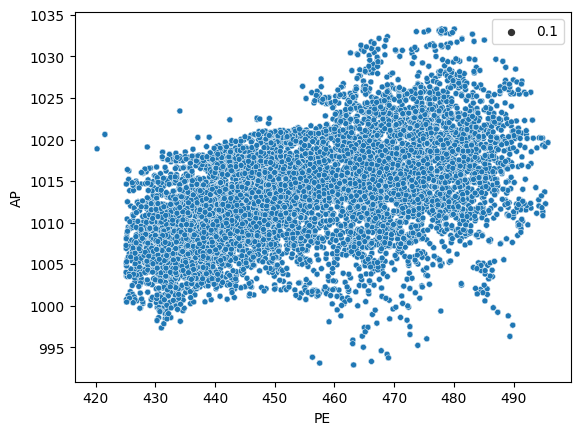

In [7]:
sns.scatterplot(x="PE", y="AP", data=df, size=0.1)
plt.show()

[Text(0.5, 1.0, 'PE vs AP')]

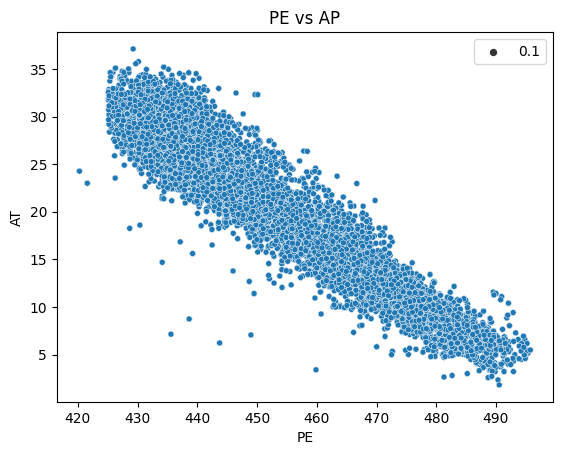

In [14]:
sns.scatterplot(x="PE", y="AT", data=df, size=0.1).set(title="PE vs AP")

[Text(0.5, 1.0, 'PE vs V')]

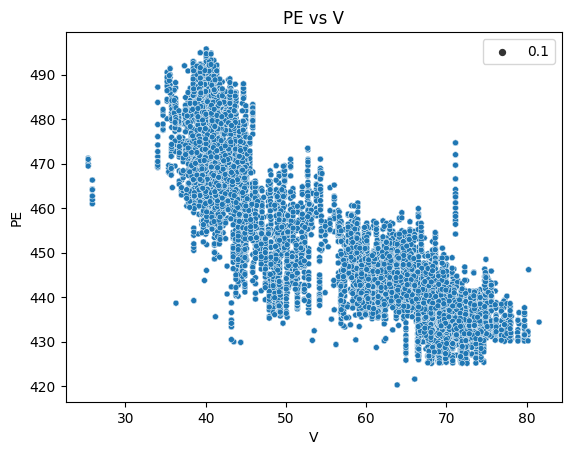

In [16]:
sns.scatterplot(x="V", y="PE", data=df, size=0.1).set(title="PE vs V")

IndexError: index 2 is out of bounds for axis 0 with size 2

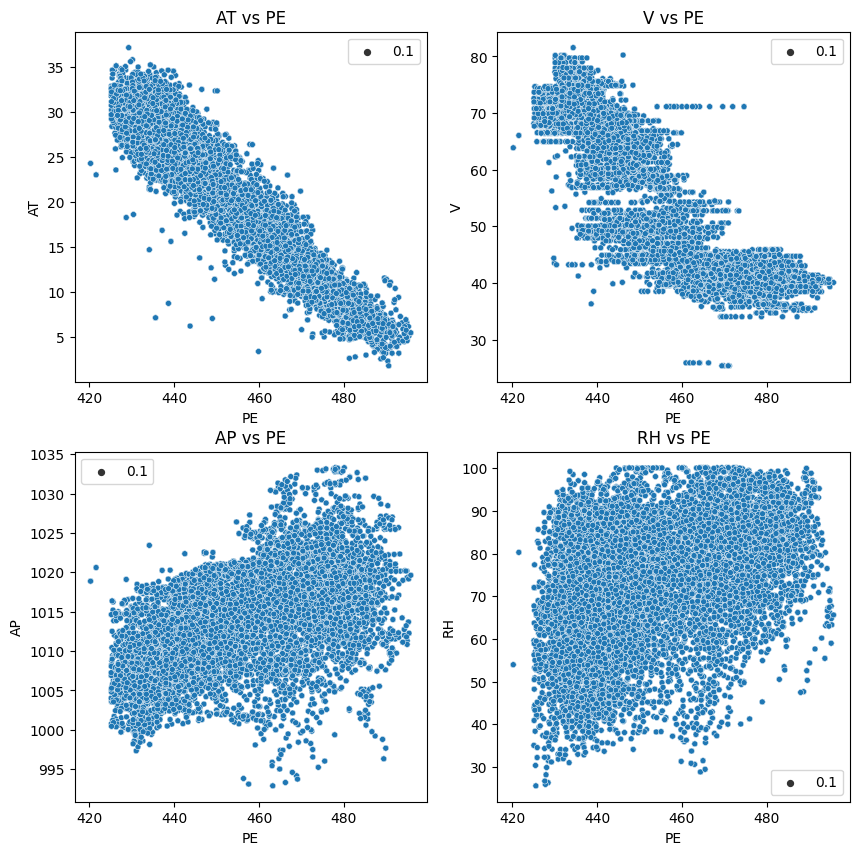

In [24]:
fig, ax = plt.subplots(2,2,figsize=(10,10))

for i, col in enumerate(df.columns):
    sns.scatterplot(x="PE", y=col, data=df, ax=ax[i//2, i%2], size=0.1).set(title=f"{col} vs PE)